<a href="https://colab.research.google.com/github/73983748-cloud/regrecion-loguistica-de-perros-y-gatos/blob/main/PRUEVA_DE_PERRO_Y_GATO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Corrección temporal (22/mayo/2022)
# Tensorflow datasets tiene error al descargar el set de perros y gatos y lo solucionaron
# el 16 de mayo pero sigue fallando en los colabs. Entonces se agrega esta linea adicional
# Mas detalle aqui: https://github.com/tensorflow/datasets/issues/3918
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

# Descargar el set de datos de perros y gatos
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

In [12]:
from sklearn.linear_model import LogisticRegression

# Instanciar el modelo de Regresión Logística
modelo_regresion_logistica = LogisticRegression(max_iter=5000) # Aumentado max_iter para convergencia

# Entrenar el modelo
modelo_regresion_logistica.fit(X_train, y_train)

print("¡Entrenamiento del modelo completado!")

¡Entrenamiento del modelo completado!


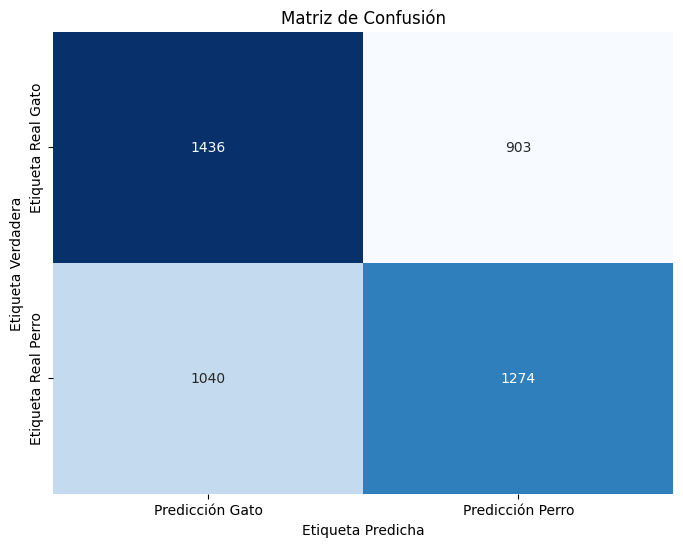

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Asumiendo que 'y_test' y 'y_pred' ya están definidos desde el paso de evaluación
# Si no, necesitarías ejecutar la celda de evaluación primero

# Calcular la matriz de confusión (si no ha sido calculada ya)
# conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicción Gato', 'Predicción Perro'],
            yticklabels=['Etiqueta Real Gato', 'Etiqueta Real Perro'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

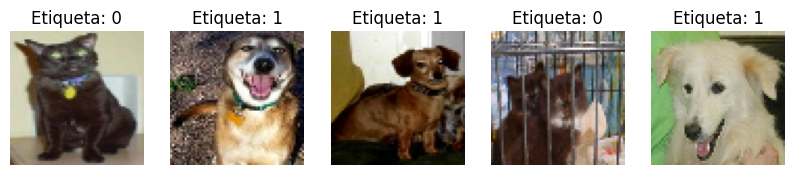

In [10]:
import matplotlib.pyplot as plt

# Función para mostrar algunas imágenes pre-procesadas
def display_preprocessed_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        # Redimensionar la imagen aplanada de vuelta a sus dimensiones originales (IMG_WIDTH, IMG_HEIGHT, num_channels)
        # Asumiendo que las imágenes originales eran a color, redimensionar a (64, 64, 3)
        image = images[i].reshape((IMG_WIDTH, IMG_HEIGHT, 3))
        plt.imshow(image) # Usar imshow por defecto para imágenes a color
        plt.title(f"Etiqueta: {labels[i]}")
        plt.axis('off')
    plt.show()

# Mostrar algunas imágenes pre-procesadas del conjunto de entrenamiento
display_preprocessed_images(X_train, y_train)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = modelo_regresion_logistica.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precisión (Accuracy): {accuracy:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print(f"\nPrecisión (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuación F1 (F1-Score): {f1:.4f}")

Precisión (Accuracy): 0.5824

Matriz de Confusión:
[[1436  903]
 [1040 1274]]

Precisión (Precision): 0.5852
Exhaustividad (Recall): 0.5506
Puntuación F1 (F1-Score): 0.5674


In [13]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("Dimensiones de las etiquetas de entrenamiento (y_train):", y_train.shape)
print("Dimensiones de las etiquetas de prueba (y_test):", y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train): (18609, 12288)
Dimensiones del conjunto de prueba (X_test): (4653, 12288)
Dimensiones de las etiquetas de entrenamiento (y_train): (18609,)
Dimensiones de las etiquetas de prueba (y_test): (4653,)


In [14]:
import numpy as np
from PIL import Image

# Definir el tamaño objetivo de la imagen
IMG_WIDTH = 64
IMG_HEIGHT = 64

def preprocess_image(image, label):
    # Redimensionar imagen
    image = tf.image.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    # Aplanar imagen
    image = tf.reshape(image, [-1])
    # Normalizar imagen
    image = image / 255.0
    return image, label

# Aplicar pre-procesamiento al conjunto de datos
datos_preprocesados = datos['train'].map(preprocess_image)

# Convertir a arrays de numpy para scikit-learn
# Iterar sobre el conjunto de datos para extraer imágenes y etiquetas
imagenes = []
etiquetas = []
for imagen, etiqueta in datos_preprocesados.as_numpy_iterator():
    imagenes.append(imagen)
    etiquetas.append(etiqueta)

X = np.array(imagenes)
y = np.array(etiquetas)

print("Dimensiones de los datos pre-procesados (X):", X.shape)
print("Dimensiones de las etiquetas (y):", y.shape)
print("Primeras 5 etiquetas:", y[:5])

Dimensiones de los datos pre-procesados (X): (23262, 12288)
Dimensiones de las etiquetas (y): (23262,)
Primeras 5 etiquetas: [1 1 1 0 1]


In [31]:
from google.colab import files
from PIL import Image
import numpy as np
import tensorflow as tf
import io

# Assuming IMG_WIDTH, IMG_HEIGHT, and modelo_regresion_logistica are already defined

def predict_uploaded_image():
    """
    Opens a file upload dialog, preprocesses the uploaded image,
    and prints the model's prediction (Cat or Dog).
    """
    archivos_subidos = files.upload()

    if not archivos_subidos:
        print("No se subió ningún archivo.")
        return

    # Get the filename of the uploaded image (assuming only one file is uploaded)
    nombre_archivo = list(archivos_subidos.keys())[0]
    imagen_bytes = archivos_subidos[nombre_archivo]

    try:
        # Load the image using PIL
        imagen_pil = Image.open(io.BytesIO(imagen_bytes))

        # Display the uploaded image
        print(f"Imagen subida: {nombre_archivo}")
        display(imagen_pil)

        # Preprocess the uploaded image
        imagen_np = np.array(imagen_pil)
        imagen_redimensionada = tf.image.resize([imagen_np], (IMG_WIDTH, IMG_HEIGHT))
        imagen_normalizada = imagen_redimensionada / 255.0
        imagen_aplanada = tf.reshape(imagen_normalizada, [-1])
        imagen_preprocesada = tf.expand_dims(imagen_aplanada, axis=0)

        # Make a prediction using the trained model
        prediccion = modelo_regresion_logistica.predict(imagen_preprocesada)
        prediccion_clase = prediccion[0]

        # Interpret the prediction and display the result
        if prediccion_clase == 0:
            print("El modelo predice que la imagen es un GATO.")
        else:
            print("El modelo predice que la imagen es un PERRO.")

    except Exception as e:
        print(f"Ocurrió un error al procesar la imagen: {e}")

# You can call this function multiple times to test different images
# predict_uploaded_image()

Ahora puedes llamar a la función `predict_uploaded_image()` en una nueva celda de código cada vez que quieras probar una imagen diferente.

Saving dog.jpeg to dog (4).jpeg
Imagen subida: dog (4).jpeg


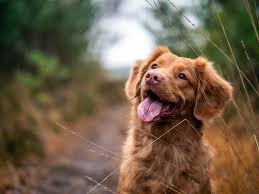

El modelo predice que la imagen es un PERRO.


In [33]:
# Llama a la función para probar una imagen
predict_uploaded_image()